In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import json

from dotenv import load_dotenv, find_dotenv
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()
project_dir = Path(dotenv_path).parent

# load up the entries as environment variables
load_dotenv(dotenv_path)

True

In [48]:
with open(project_dir/'models/pso_train_preds.json', 'r') as f:
    preds = json.load(f)
    
len(preds)

962

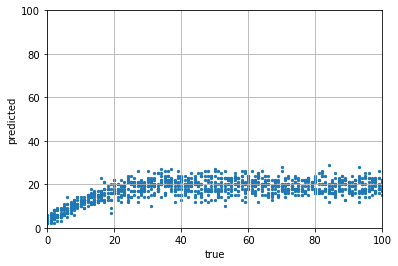

In [21]:
ys = np.array([int(y.split('_')[-1].split('.')[0]) for y in preds.keys()])
y_hats = np.array(list(preds.values()))

plt.scatter(ys, y_hats, s=5)

plt.ylabel('predicted')
plt.xlabel('true')

plt.xlim(0,100)
plt.ylim(0,100)
plt.grid()
plt.show()

After 20 parts in the box the thing gets quite random.

In [40]:
df = pd.DataFrame([ys, y_hats]).T
df.columns = ['true', 'predicted']

df['error'] = (df['true'] - df['predicted']).abs()
df

,true,predicted,error
0,57,23,34
1,69,19,50
2,28,21,7
3,88,21,67
4,67,19,48
...,...,...,...
952,28,22,6
953,13,18,5
954,86,19,67
955,81,18,63


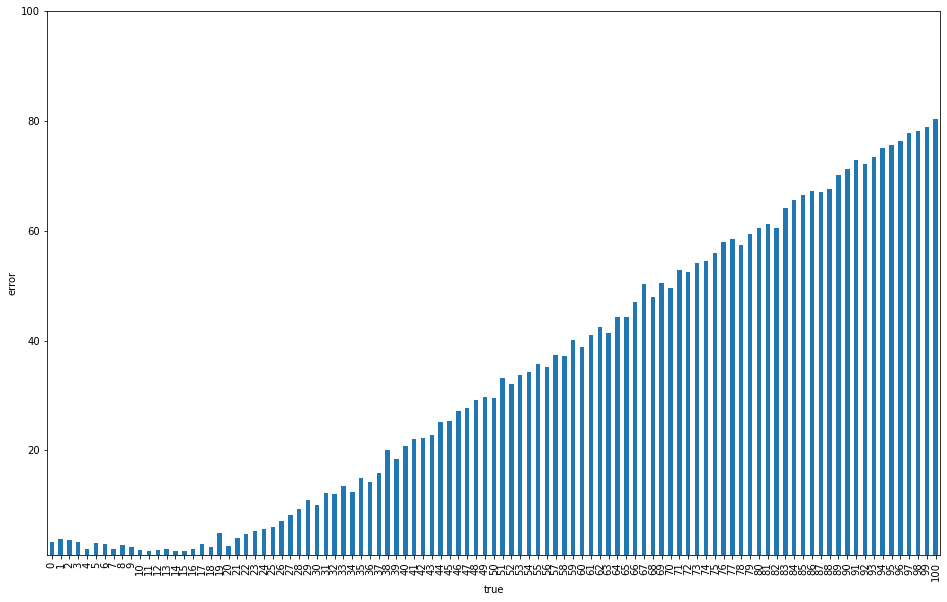

In [46]:
plt.gcf().set_size_inches(16,10)
df.groupby('true')['error'].mean().plot(kind='bar')

plt.ylabel('error')
plt.xlabel('true')

# plt.yscale('log')
plt.ylim(1,100)

plt.show()